# 1.Problem Statement

# Import Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stack_over_flow.csv to stack_over_flow (1).csv


In [ ]:
data = pd.read_csv("stack_over_flow.csv")

In [ ]:
data

,Unnamed: 0,title,body,tags
0,0,Join Text inside of a Google Sheet Query,I want to find a way to join text of a query a...,"google-sheets,google-sheets-formula"
1,1,Zuul can't route to FastAPI in Docker on Windo...,I’m running a Spring Cloud Zuul API gateway zu...,"spring-boot,docker,fastapi,netflix-zuul"
2,2,How to make my website php version current?,My website has a very old design. Should I upg...,"php,web"
3,3,JAVA_HOME is set to an invalid directory but t...,The error : >flutter build apk ERROR: JAVA_HOM...,"java,flutter,gradle"
4,4,PTZ hikivision camera to make facial recogniti...,Aim - we are working with a hikivision ptz cam...,"computer-vision,camera"
...,...,...,...,...
4994,4994,Custom IExceptionHandler does not catch except...,I have a behaviour in my API which I don't kno...,"rest,asp.net-core"
4995,4995,Issue Applying CIS Policy 'Do not allow WebAut...,"I am applying the CIS policy: ""Ensure 'Do not ...","windows,powershell,regedit,windows-server-2022"
4996,4996,Flutter iOS deep linking pushes same screen tw...,I'm building a Flutter app using GetX for navi...,"flutter,deep-linking,flutter-getx"
4997,4997,How to use a recursive CTE in a JOIN statement,I'm working on converting an old database and ...,"sql,mysql,recursion,common-table-expression"


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data

,title,body,tags
0,Join Text inside of a Google Sheet Query,I want to find a way to join text of a query a...,"google-sheets,google-sheets-formula"
1,Zuul can't route to FastAPI in Docker on Windo...,I’m running a Spring Cloud Zuul API gateway zu...,"spring-boot,docker,fastapi,netflix-zuul"
2,How to make my website php version current?,My website has a very old design. Should I upg...,"php,web"
3,JAVA_HOME is set to an invalid directory but t...,The error : >flutter build apk ERROR: JAVA_HOM...,"java,flutter,gradle"
4,PTZ hikivision camera to make facial recogniti...,Aim - we are working with a hikivision ptz cam...,"computer-vision,camera"
...,...,...,...
4994,Custom IExceptionHandler does not catch except...,I have a behaviour in my API which I don't kno...,"rest,asp.net-core"
4995,Issue Applying CIS Policy 'Do not allow WebAut...,"I am applying the CIS policy: ""Ensure 'Do not ...","windows,powershell,regedit,windows-server-2022"
4996,Flutter iOS deep linking pushes same screen tw...,I'm building a Flutter app using GetX for navi...,"flutter,deep-linking,flutter-getx"
4997,How to use a recursive CTE in a JOIN statement,I'm working on converting an old database and ...,"sql,mysql,recursion,common-table-expression"


In [ ]:
 datac = data.copy()

In [ ]:
datac

,title,body,tags
0,Join Text inside of a Google Sheet Query,I want to find a way to join text of a query a...,"google-sheets,google-sheets-formula"
1,Zuul can't route to FastAPI in Docker on Windo...,I’m running a Spring Cloud Zuul API gateway zu...,"spring-boot,docker,fastapi,netflix-zuul"
2,How to make my website php version current?,My website has a very old design. Should I upg...,"php,web"
3,JAVA_HOME is set to an invalid directory but t...,The error : >flutter build apk ERROR: JAVA_HOM...,"java,flutter,gradle"
4,PTZ hikivision camera to make facial recogniti...,Aim - we are working with a hikivision ptz cam...,"computer-vision,camera"
...,...,...,...
4994,Custom IExceptionHandler does not catch except...,I have a behaviour in my API which I don't kno...,"rest,asp.net-core"
4995,Issue Applying CIS Policy 'Do not allow WebAut...,"I am applying the CIS policy: ""Ensure 'Do not ...","windows,powershell,regedit,windows-server-2022"
4996,Flutter iOS deep linking pushes same screen tw...,I'm building a Flutter app using GetX for navi...,"flutter,deep-linking,flutter-getx"
4997,How to use a recursive CTE in a JOIN statement,I'm working on converting an old database and ...,"sql,mysql,recursion,common-table-expression"


# Simple EDA

###  Inspecting Dataframe Structure

In [ ]:
datac.shape

(4999, 3)

In [ ]:
datac.head()

,title,body,tags
0,Join Text inside of a Google Sheet Query,I want to find a way to join text of a query a...,"google-sheets,google-sheets-formula"
1,Zuul can't route to FastAPI in Docker on Windo...,I’m running a Spring Cloud Zuul API gateway zu...,"spring-boot,docker,fastapi,netflix-zuul"
2,How to make my website php version current?,My website has a very old design. Should I upg...,"php,web"
3,JAVA_HOME is set to an invalid directory but t...,The error : >flutter build apk ERROR: JAVA_HOM...,"java,flutter,gradle"
4,PTZ hikivision camera to make facial recogniti...,Aim - we are working with a hikivision ptz cam...,"computer-vision,camera"


###  Inspecting DataFrame Content

In [ ]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4999 non-null   object
 1   body    4999 non-null   object
 2   tags    4999 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


#### Checking for null values

In [ ]:
datac.isnull().sum()

,0
title,0
body,0
tags,0


#### Checking for duplicates

In [ ]:
datac.duplicated().sum()

np.int64(2)

In [ ]:
datac.drop_duplicates(inplace=True)

In [ ]:
#datac[datac.duplicated()]

#### Checking for the presence of tags ,emojis,numbers,links etc.,

In [ ]:
pip install emoji

In [ ]:
def simple_EDA(data,column):
    import emoji
    import string

    lower_upper = data[column].apply(lambda x: False if((x.islower()) or (x.isupper())) else True).sum()
    html_xml = data[column].apply(lambda x : True if re.search("<.*?>",x) else False).sum()
    urls = data[column].apply(lambda x: True if re.search("https?://\S+",x) else False).sum()
    emails = data[column].apply(lambda x : True if re.search("\S+@\S+",x) else False).sum()
    mentions = data[column].apply(lambda x : True if re.search("\B[@#]\S+",x) else False).sum()
    emo = data[column].apply(lambda x : True if emoji.emoji_count(x) else False).sum()
    digits = data[column].apply(lambda x : True if re.search("\d+",x) else False).sum()
    punc = data[column].apply(lambda x : True if re.search('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',x) else False).sum()
    dates = data[column].apply(lambda x : True if (re.search(r"\b[0-9]{1,2}\/[0-9]{1,2}\/[0-9]{4}\b",x)) or (re.search(r"\b[0-9]{4}\/[0-9]{1,2}\/[0-9]{1,2}\b",x)) else False).sum()


    if lower_upper > 0:
        print("Have both lower and upper case")
    if html_xml > 0:
        print("Have Tags")
    if urls > 0:
        print("Have urls")
    if emails > 0:
        print("Have emails")
    if mentions > 0:
        print("Have mentions")
    if emo > 0:
        print("Have emojis")
    if digits > 0:
        print("Have digits")
    if punc > 0:
        print("Have Punctuations")
    if dates > 0:
        print("Have dates")

In [ ]:
simple_EDA(datac,"title")

Have both lower and upper case
Have Tags
Have urls
Have emails
Have mentions
Have emojis
Have digits
Have Punctuations


In [ ]:
simple_EDA(datac,"body")

Have both lower and upper case
Have Tags
Have emails
Have mentions
Have emojis
Have digits
Have Punctuations
Have dates


In [ ]:
simple_EDA(datac,"tags")

Have digits
Have Punctuations


# Exploratory Data Analysis

### Number of tags per question

In [ ]:
datac1 = datac.copy()

In [ ]:
datac1['tags_list'] = datac1['tags'].str.split(',')
datac1['num_tags'] = datac1['tags_list'].apply(len)

In [ ]:
datac1['num_tags'],datac1['num_tags']

(0       2
 1       4
 2       2
 3       3
 4       2
        ..
 4994    2
 4995    4
 4996    3
 4997    4
 4998    2
 Name: num_tags, Length: 4997, dtype: int64,
 0       2
 1       4
 2       2
 3       3
 4       2
        ..
 4994    2
 4995    4
 4996    3
 4997    4
 4998    2
 Name: num_tags, Length: 4997, dtype: int64)

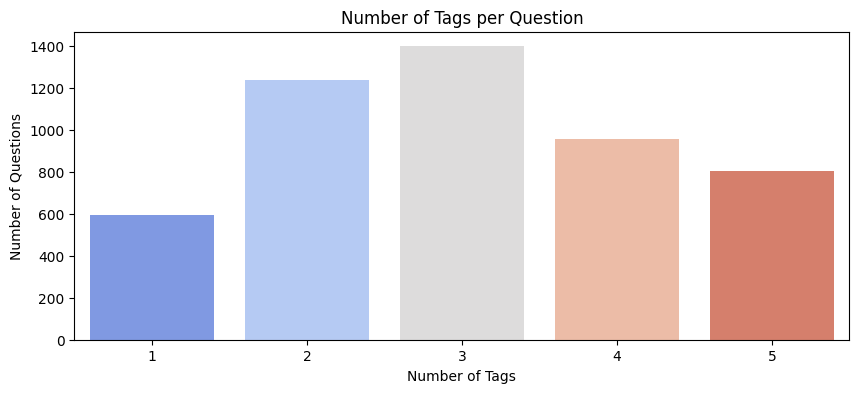

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='num_tags', data=datac1, palette = 'coolwarm')
plt.title("Number of Tags per Question")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Questions")
plt.show()

### Most frequent tags

In [ ]:
all_tags = [tag for tags in datac1['tags_list'] for tag in tags]
tag_counts = pd.DataFrame(Counter(all_tags).most_common(20), columns=['Tag', 'Count'])

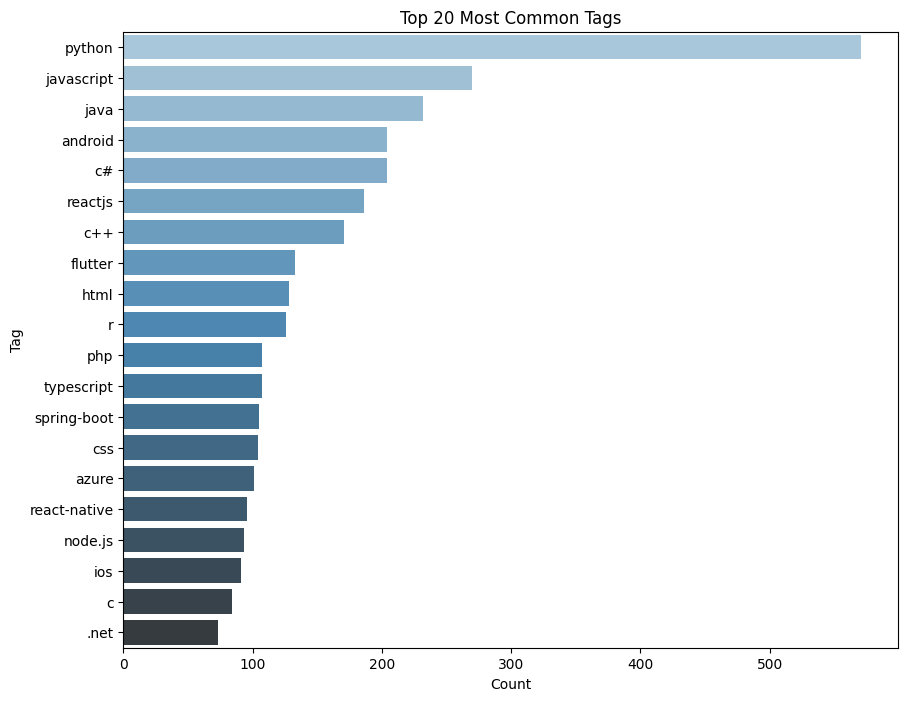

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Tag', data=tag_counts, palette='Blues_d')
plt.title("Top 20 Most Common Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

### Text Length Analysis

In [ ]:
datac1['title_len'] = datac1['title'].str.len()
datac1['body_len'] = datac1['body'].str.len()

In [ ]:
datac1['title_len'],datac1['body_len']

(0        40
 1        85
 2        43
 3        69
 4       144
        ... 
 4994     69
 4995     61
 4996    103
 4997     46
 4998     51
 Name: title_len, Length: 4999, dtype: int64,
 0       177
 1       201
 2       204
 3       198
 4       201
        ... 
 4994    203
 4995    193
 4996    201
 4997    202
 4998    155
 Name: body_len, Length: 4999, dtype: int64)

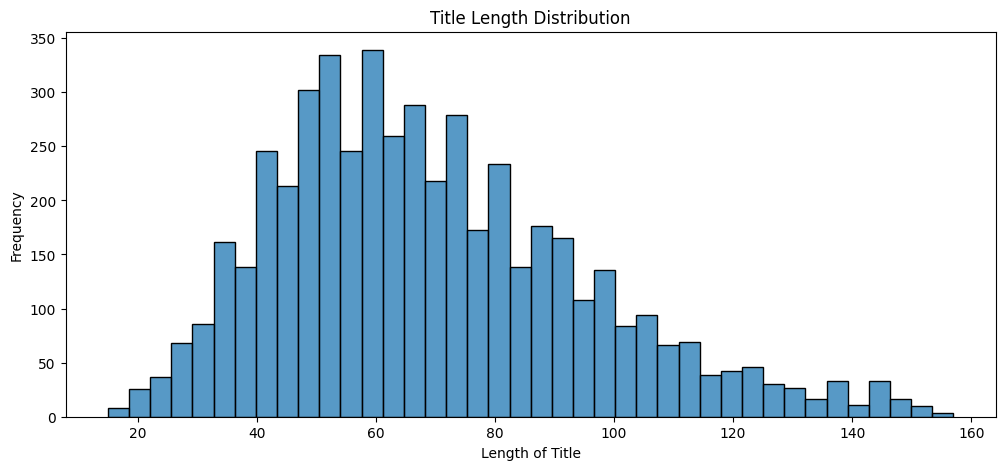

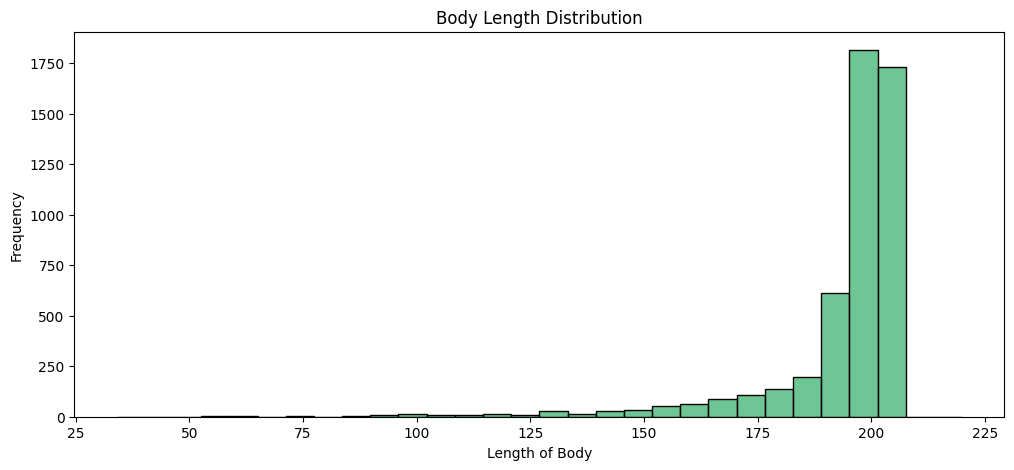

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(datac1['title_len'], bins=40)
plt.title("Title Length Distribution")
plt.xlabel("Length of Title")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(datac1['body_len'], bins=30, color='mediumseagreen')
plt.title("Body Length Distribution")
plt.xlabel("Length of Body")
plt.ylabel("Frequency")
plt.show()

### Heatmap of Tag Co-occurrence

In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
pair_counts = Counter()

for tags in datac1['tags_list']:
    for pair in combinations(sorted(tags), 2):  # get all tag pairs
        pair_counts[pair] += 1

In [ ]:
tag_freq = Counter(tag for tags in datac1['tags_list'] for tag in tags)
top_tags = [tag for tag, _ in tag_freq.most_common(15)]


co_matrix = pd.DataFrame(0, index=top_tags, columns=top_tags)

# Fill co-occurrence matrix
for (tag1, tag2), count in pair_counts.items():
    if tag1 in top_tags and tag2 in top_tags:
        co_matrix.loc[tag1, tag2] = count
        co_matrix.loc[tag2, tag1] = count

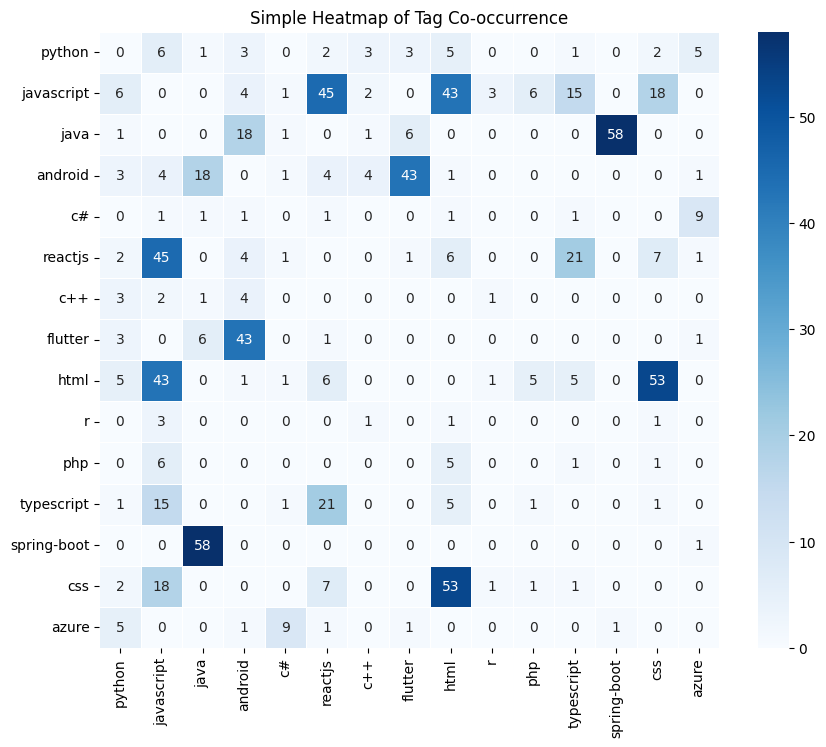

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title("Simple Heatmap of Tag Co-occurrence")
plt.show()

### Word Cloud for Titles

In [ ]:
title_text = " ".join(datac1['title'].tolist())
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(title_text)

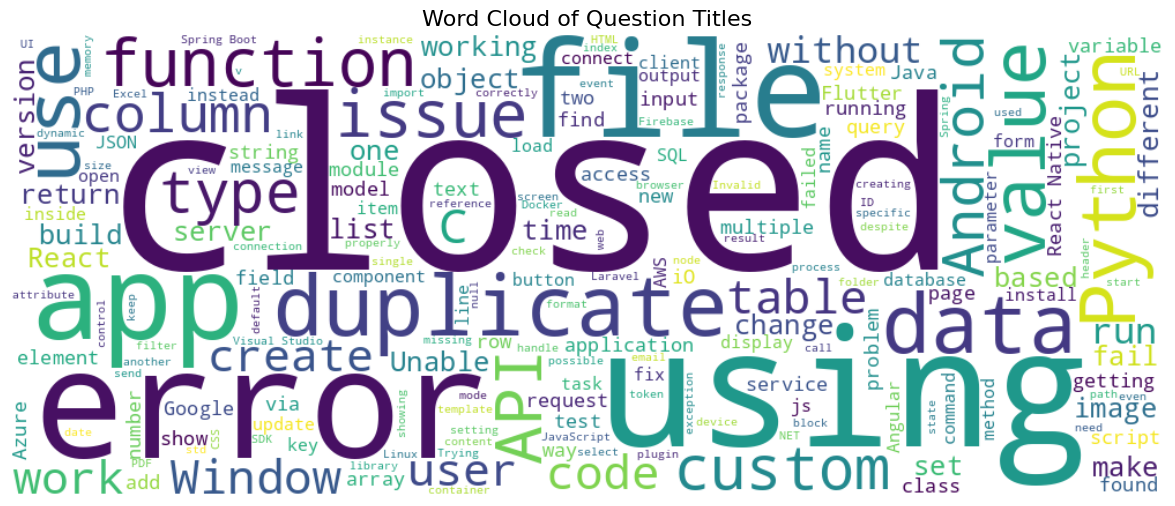

In [ ]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Titles", fontsize=16)
plt.show()

### Word Cloud for Body

In [ ]:
body_text = " ".join(datac1['body'].sample(1000).tolist())  # Sample for performance
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(body_text)

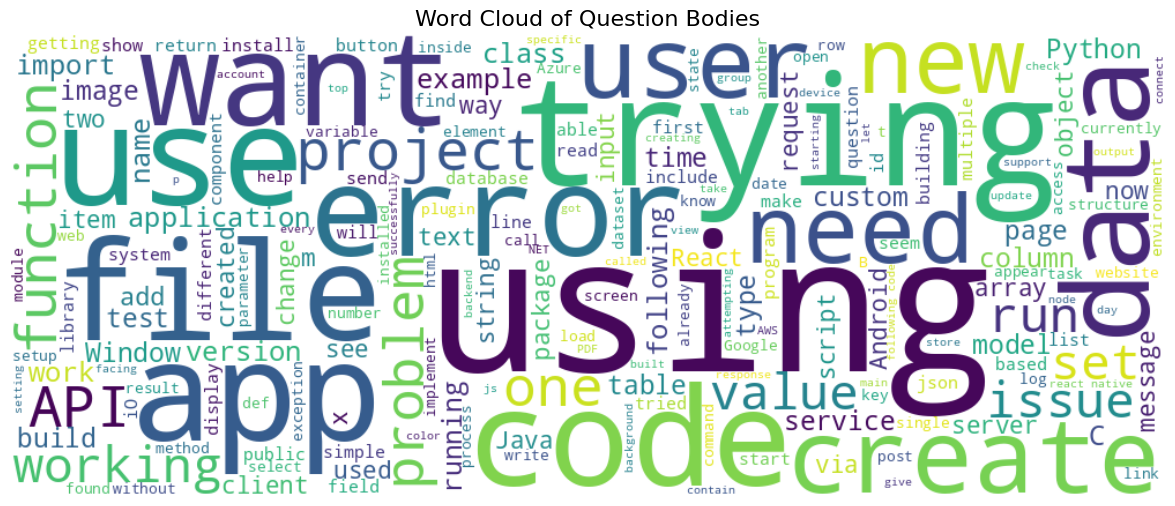

In [ ]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Bodies", fontsize=16)
plt.show()

###  Tags vs. Title/Body Length

In [ ]:
datac1['title_len'] = datac1['title'].str.len()
datac1['body_len'] = datac1['body'].str.len()
datac1['tags_list'] = datac1['tags'].str.split(',')
datac1['num_tags'] = datac1['tags_list'].apply(len)

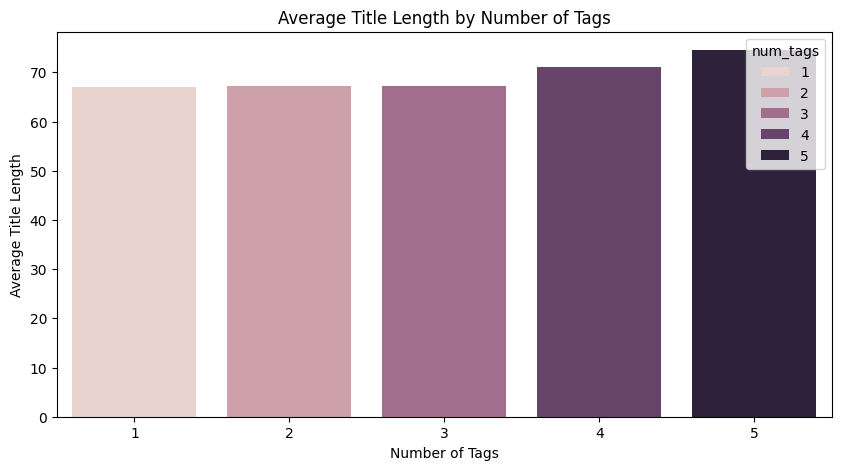

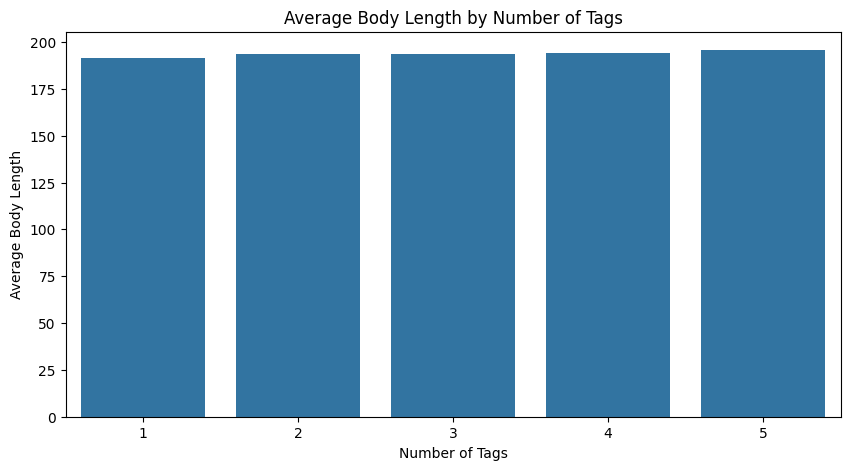

In [ ]:
title_avg = datac1.groupby('num_tags')['title_len'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='num_tags', y='title_len', data=title_avg,hue ='num_tags' )
plt.title("Average Title Length by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Average Title Length")
plt.show()

body_avg = datac1.groupby('num_tags')['body_len'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='num_tags', y='body_len', data=body_avg )
plt.title("Average Body Length by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Average Body Length")
plt.show()

# Data Preprocessing

###  Preprocessing of Data (i.e removing stopwords ,tags,urls etc.,)

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.4 MB/s eta 0:00:00


In [ ]:
def pre_processing(data, column, case = "lower", tags = True, urls = True, emails = True, mentions = True, digits = True, dates = True, emojis = True, contractionss = True, stop_words = True, stems = "porter", inflected = "stem", punctuations = True):

    import re
    import emoji
    import contractions
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
    import string

    ps = PorterStemmer()
    sn = SnowballStemmer(language = "english")
    ls = LancasterStemmer()
    wl = WordNetLemmatizer()

    # Stopwords creation
    stp = stopwords.words("english")
    stp.remove("not")

    acronyms = {"gm": "good morning", "gn": "good night", "omg": "oh my god", "mrng": "morning"}

    # Emoji
    if emojis == True:
        data[column] = data[column].apply(lambda x: emoji.demojize(x, delimiters=("", "")))
    else:
        pass

    # Cases
    if case == "lower":
        data[column] = data[column].str.lower()
    elif case == "upper":
        data[column] = data[column].str.upper()
    else:
        pass

    # Tags
    if tags == True:
        data[column] = data[column].apply(lambda x: re.sub("<.*?>", " ", x))
    else:
        pass

    # URLs
    if urls == True:
        data[column] = data[column].apply(lambda x: re.sub(r"http[s]?://+\S+", " ", x))
    else:
        pass

    # Emails
    if emails == True:
        data[column] = data[column].apply(lambda x: re.sub(r"\S+@\S+", " ", x))
    else:
        pass

    # Mentions and Hashtags
    if mentions == True:
        data[column] = data[column].apply(lambda x: re.sub(r"\B[@#]\S+", " ", x))
    else:
        pass

    # Digits
    if digits == True:
        data[column] = data[column].apply(lambda x: re.sub(r"\d", " ", x))
    else:
        pass

    # Dates
    if dates == True:
        data[column] = data[column].apply(lambda x: re.sub(r"\b[0-9]{1,2}/[0-9]{1,2}/[0-9]{4}\b", " ", x))
        data[column] = data[column].apply(lambda x: re.sub(r"\b[0-9]{4}/[0-9]{1,2}/[0-9]{1,2}\b", " ", x))
    else:
        pass

    # Contractions
    if contractionss == True:
        data[column] = data[column].apply(lambda x: contractions.fix(x))
    else:
        pass

    # Stopwords
    if stop_words == True:
        l2 = []
        for doc in data[column]:  # Looping through docs
            l1 = []
            for word in word_tokenize(doc):  # Looping through words
                if word not in stp:  # Checking word is present or not
                    l1.append(word)
            l2.append(" ".join(l1))
        data[column] = l2
    else:
        pass

    # Stemming and Lemmatization
    if inflected == "stem":
        s2 = []
        for doc in data[column]:
            s1 = []
            for word in word_tokenize(doc):
                if stems == "porter":
                    s1.append(ps.stem(word))
                elif stems == "snowball":
                    s1.append(sn.stem(word))
                elif stems == "lancaster":
                    s1.append(ls.stem(word))
            s2.append(" ".join(s1))
        data[column] = s2
    elif inflected == "lemma":
        s4 = []
        for doc in data[column]:
            s3 = []
            for word in word_tokenize(doc):
                s3.append(wl.lemmatize(word))
            s4.append(" ".join(s3))
        data[column] = s4
    else:
        pass

    # Punctuations
    if punctuations == True:
        data[column] = data[column].apply(lambda x: re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', " ", x))
    else:
        pass

    return data

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
datac = pre_processing(datac,"title")

In [ ]:
datac

,question_id,title,tags,score,creation_date,body
0,79643619,face recognit,"python, face-recognition",-8,1748509412,<p>The problem involves developing a program t...
1,79643597,two python dictionari initi default paramet po...,"python, python-3.x, dictionary",0,1748508524,<p>I am using Python 3.12 and wanted to initia...
2,79643566,panda is year end,"python, pandas",2,1748507235,<p>I am using Python 3.11.3 on Windows and Pan...
3,79643540,remov duplic asset serial number use python,"python, csv",-1,1748506250,<p>I'm cleaning up a basic asset inventory sto...
4,79643480,instal ssl python aw ec instanc,"python, python-3.x, amazon-web-services, amazo...",-4,1748504066,<p>I am currently trying to install python 3.1...
...,...,...,...,...,...,...
3995,78209777,userwarn rnn modul weight not part singl con...,"machine-learning, deep-learning, pytorch, lstm",0,1711169290,<p>Was working on a Siamese LSTM model for cla...
3996,78209363,make neural network multipl output multipl c...,"python, deep-learning, pytorch, neural-network",0,1711153727,<p>I am working on a multi-output (i.e &gt; 1 ...
3997,78208603,dimens weight torch nn functional linear ...,"machine-learning, matrix, deep-learning, pytorch",0,1711137702,<p>In the documentation of torch.nn.functional...
3998,78204360,upgrad acceler use trainer class,"deep-learning, pytorch, nlp, huggingface-trans...",0,1711088285,<p>I am facing an issue whilst using Trainer c...


In [ ]:
datac = pre_processing(datac,"body")

In [ ]:
datac

,title,body,tags
0,join text insid googl sheet queri,want find way join text queri reduc column out...,"google-sheets,google-sheets-formula"
1,zuul not rout fastapi docker window — work ngi...,run spring cloud zuul api gateway zuul proxy j...,"spring-boot,docker,fastapi,netflix-zuul"
2,make websit php version current,websit old design upgrad php version devel...,"php,web"
3,java hom set invalid directori error not correct,error flutter build apk error java hom s...,"java,flutter,gradle"
4,ptz hikivis camera make facial recognit system...,aim work hikivis ptz camera ds de iw aeb wa...,"computer-vision,camera"
...,...,...,...
4994,custom iexceptionhandl not catch except build one,behaviour api not know solv least research f...,"rest,asp.net-core"
4995,issu appli ci polici do not allow webauthn re...,appli ci polici ensur do not allow webau...,"windows,powershell,regedit,windows-server-2022"
4996,flutter io deep link push screen twice use get...,build flutter app use getx navig app link pack...,"flutter,deep-linking,flutter-getx"
4997,use recurs cte join statement,work convert old databas queri recurs cte cu...,"sql,mysql,recursion,common-table-expression"


###  Numerical Representation of Features and Class Lables

In [ ]:
datac['text'] = datac['title'] + ' ' + datac['body']

In [ ]:
 datac = datac[['text','tags']]

In [ ]:
datac

,text,tags
0,join text insid googl sheet queri want find wa...,"google-sheets,google-sheets-formula"
1,zuul not rout fastapi docker window — work ngi...,"spring-boot,docker,fastapi,netflix-zuul"
2,make websit php version current websit old d...,"php,web"
3,java hom set invalid directori error not corre...,"java,flutter,gradle"
4,ptz hikivis camera make facial recognit system...,"computer-vision,camera"
...,...,...
4994,custom iexceptionhandl not catch except build ...,"rest,asp.net-core"
4995,issu appli ci polici do not allow webauthn re...,"windows,powershell,regedit,windows-server-2022"
4996,flutter io deep link push screen twice use get...,"flutter,deep-linking,flutter-getx"
4997,use recurs cte join statement work convert old...,"sql,mysql,recursion,common-table-expression"


In [ ]:
fv = datac['text']
cv = datac['tags']

In [ ]:
# Split into train and test
X_train_text, X_test_text, y_train_labels, y_test_labels = train_test_split(fv, cv, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
tfidf = TfidfVectorizer(max_features =5000,stop_words = 'english')
X_vec = tfidf.fit_transform(X_train_text)

In [ ]:
X_test_vec = tfidf.transform(X_test_text)

In [ ]:
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(y_train_labels)
y_test_bin = mlb.transform(y_test_labels)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000)
model.fit(X_vec, y_bin)

MLPClassifier(hidden_layer_sizes=100, max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_vec)

In [ ]:
subset_acc = accuracy_score(y_test_bin, y_pred)
subset_acc

0.0

In [ ]:
from sklearn.metrics import f1_score

f1_micro = f1_score(y_test_bin, y_pred, average='micro')
f1_macro = f1_score(y_test_bin, y_pred, average='macro')
f1_weighted = f1_score(y_test_bin, y_pred, average='weighted')

In [ ]:
print("F1 Micro:", f1_micro)
print("F1 Macro:", f1_macro)
print("F1 Weighted:", f1_weighted)

F1 Micro: 0.6938760832823906
F1 Macro: 0.4674620171315225
F1 Weighted: 0.6856364795335992


In [ ]:
model1 = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# Fit the model
model1.fit(X_vec, y_bin)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
y_pred1 = model1.predict(X_test_vec)

In [ ]:
subset_acc = accuracy_score(y_test_bin, y_pred1)
subset_acc

0.001

In [ ]:
f1_micro = f1_score(y_test_bin, y_pred1, average='micro')     # Global performance
f1_macro = f1_score(y_test_bin, y_pred1, average='macro')     # Equal weight to all classes
f1_weighted = f1_score(y_test_bin, y_pred1, average='weighted')

In [ ]:
print("F1 Micro:", f1_micro)
print("F1 Macro:", f1_macro)
print("F1 Weighted:", f1_weighted)

F1 Micro: 0.7368346344925479
F1 Macro: 0.3955029905532848
F1 Weighted: 0.6833851783485423


In [ ]:
import pickle


with open("model12.pkl", "wb") as f:
    pickle.dump(model1, f)

with open("tfidf12.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("mlb12.pkl", "wb") as f:
    pickle.dump(mlb, f)